<a href="https://colab.research.google.com/github/As2909/Cognifyz_Technologies/blob/main/Task_1_Predict_Restaurant_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [8]:
# Read the csv file as "res_df" Dataframe
res_df = pd.read_csv("/content/Dataset.csv")
res_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
# check the number of rows of columns
res_df.shape

(9551, 21)

In [10]:
# All columns names
res_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
res_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [12]:
# See the statsical data
res_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Drop Duplicates

In [13]:
res_df.drop_duplicates(inplace=True)

Handling the missing values

In [14]:
# check for any null values
res_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
# Cuisines columns having 9 missing values
res_df["Cuisines"].isnull().sum()

9

In [16]:
# Use the mode for categorial column["Cuisines"] to fill the missing values
mode_cuisines = res_df["Cuisines"].mode()[0]
print(mode_cuisines)


North Indian


In [17]:
# Place the mode values in the missing values
res_df["Cuisines"].fillna(mode_cuisines, inplace=True)

# check for again any null values
res_df["Cuisines"].isnull().sum()

0

In [18]:
# Top five listing restaurants in dataset
res_df["Restaurant Name"].value_counts().head()

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64

Text(0.5, 1.0, 'Name vs Number of Restaurants')

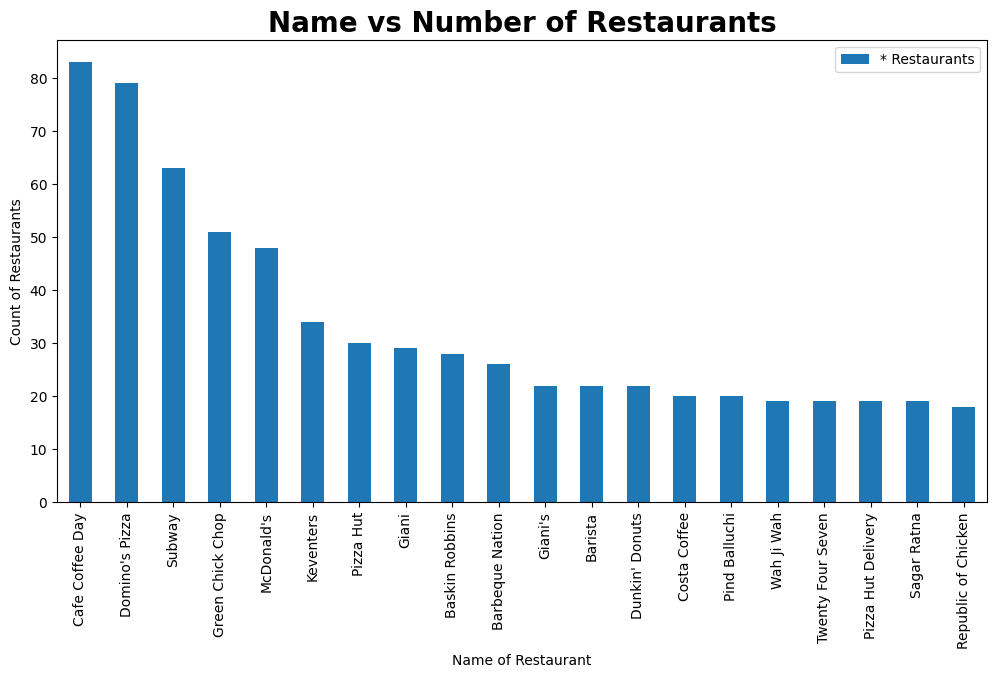

In [19]:
plt.figure(figsize= (12, 6))
# Select only the top 20 most frequent restaurant names
ax = res_df["Restaurant Name"].value_counts()[:20].plot(kind = "bar")
ax.legend(["* Restaurants"])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurants", fontsize=20, weight= "bold")

In [20]:
# Number of restaurants accepting online orders
res_df["Has Online delivery"].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

Text(0.5, 0, 'Online Orders')

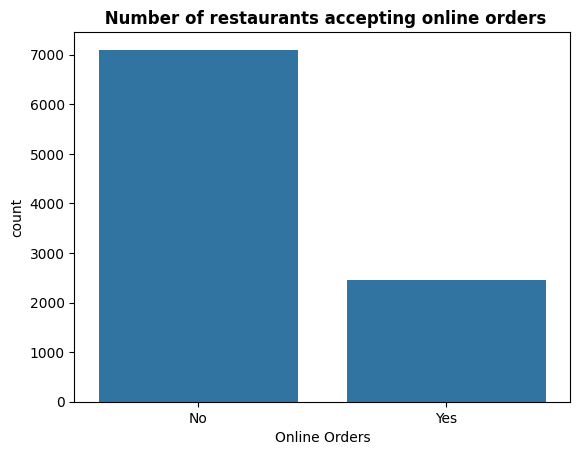

In [21]:
ax = sns.countplot(x=res_df["Has Online delivery"])
plt.title(" Number of restaurants accepting online orders" , weight = "bold")
plt.xlabel("Online Orders")


In [22]:
res_df["Has Table booking"].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

Text(0, 0.5, 'No. of Restaurants')

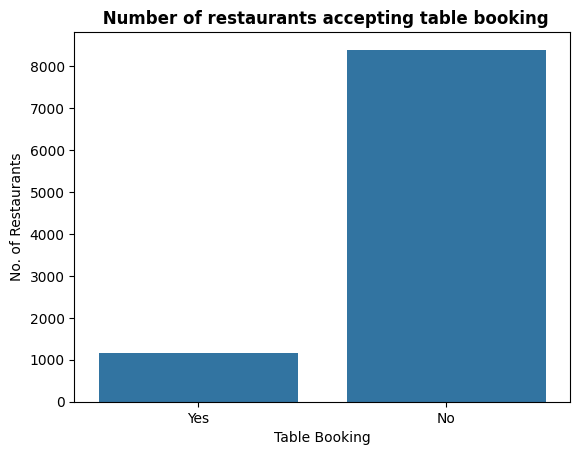

In [23]:
sns.countplot(x=res_df["Has Table booking"])
plt.title(" Number of restaurants accepting table booking" , weight = "bold")
plt.xlabel("Table Booking")
plt.ylabel("No. of Restaurants")

In [24]:
# Top 10 Location where most restaurants present
res_df["City"].value_counts()[:10]

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

In [25]:
res_df["Is delivering now"].value_counts()

Is delivering now
No     9517
Yes      34
Name: count, dtype: int64

Text(0, 0.5, 'No. of Restaurants')

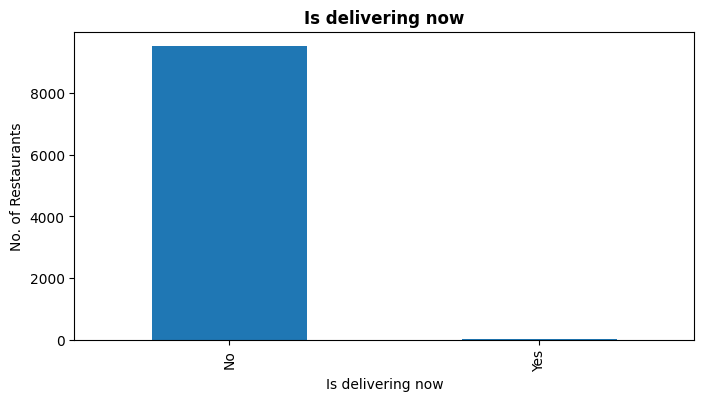

In [26]:
plt.figure(figsize=(8, 4))
ax= res_df["Is delivering now"].value_counts().plot(kind="bar")
plt.title("Is delivering now" , weight = "bold")
plt.xlabel("Is delivering now")
plt.ylabel("No. of Restaurants")

In [27]:
# Total number of city
res_df["City"].nunique()

141

Text(0.5, 1.0, 'Location')

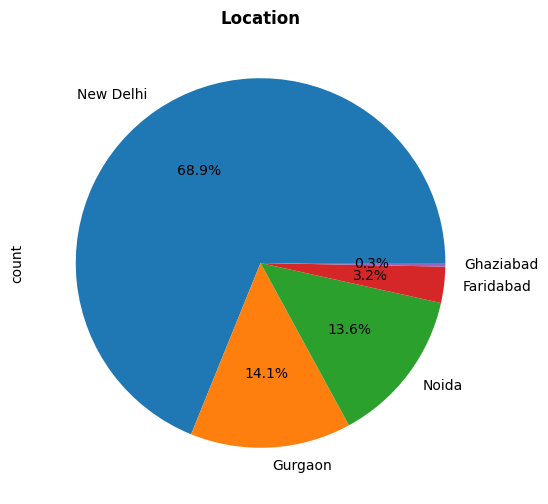

In [28]:
# Top 5 location where most restaurants locate
plt.figure(figsize= (12,6))
ax = res_df["City"].value_counts()[:5].plot(kind="pie", autopct="%1.1f%%")
plt.title("Location" , weight = "bold")


In [29]:
res_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [30]:
# Top 10 Cuisines
res_df["Cuisines"].value_counts()[:10]

Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Text(0, 0.5, 'No. of Restaurants')

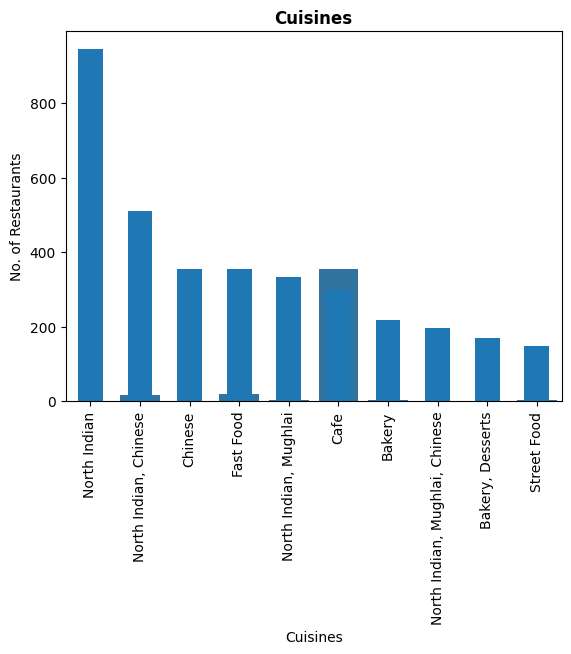

In [31]:
sns.countplot(x=res_df["Cuisines"])
ax = res_df["Cuisines"].value_counts()[:10].plot(kind="bar")
plt.title("Cuisines" , weight = "bold")
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")

In [32]:
cuisines_data = res_df["Cuisines"]
cuisines_data = cuisines_data.apply(lambda x : x.lower().strip())

In [33]:
cuisines_count = []

for i in cuisines_data:
  for j in i.split(","):
    cuisines_count.append(j.strip())

Text(0, 0.5, 'No. of Restaurants')

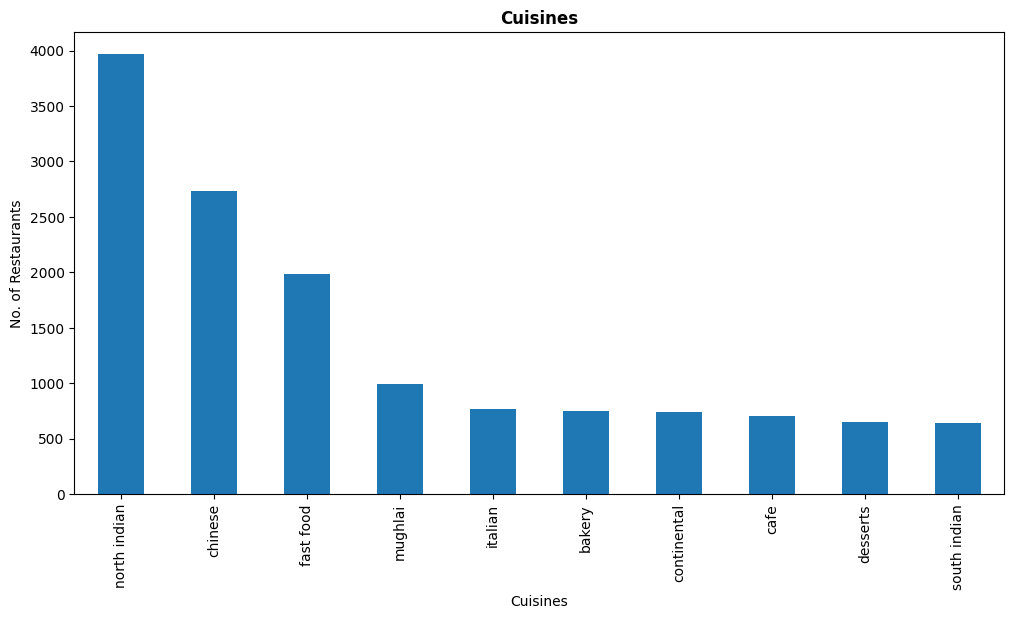

In [34]:
plt.figure(figsize=(12, 6))
ax = pd.Series(cuisines_count).value_counts()[:10].plot(kind="bar")
plt.title("Cuisines" , weight = "bold")
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")

In [35]:
# Average Cost
res_df["Average Cost for two"].value_counts()[:20]

Average Cost for two
500     900
300     897
400     857
200     687
600     652
250     461
350     457
700     403
150     367
100     353
800     347
450     335
1000    281
1500    190
550     183
650     177
25      174
1200    145
10      128
40      115
Name: count, dtype: int64

Text(0.5, 1.0, 'Average Cost for two')

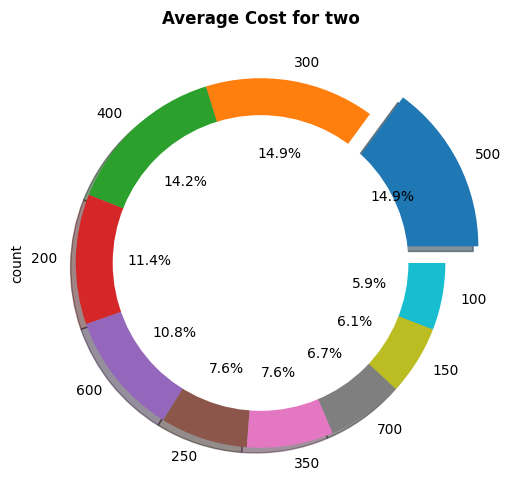

In [36]:
fig = plt.figure(figsize=(12, 6))
explode = (0.2, 0, 0, 0, 0, 0 , 0, 0, 0, 0)

delpot = res_df["Average Cost for two"].value_counts()[:10].plot(kind="pie", autopct="%1.1f%%", fontsize=10, shadow=True, explode=explode)

# Draw Centre Circle
centre_circle = plt.Circle((0,0), 0.80, fc ="white")
# Get a reference to current figure (pie figure)
fig = plt.gcf()
# Add a center circle to current figure axis(pie)
fig.gca().add_artist(centre_circle)

plt.title("Average Cost for two" , weight = "bold")

In [37]:
res_df["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Text(0, 0.5, 'No. of Restaurants')

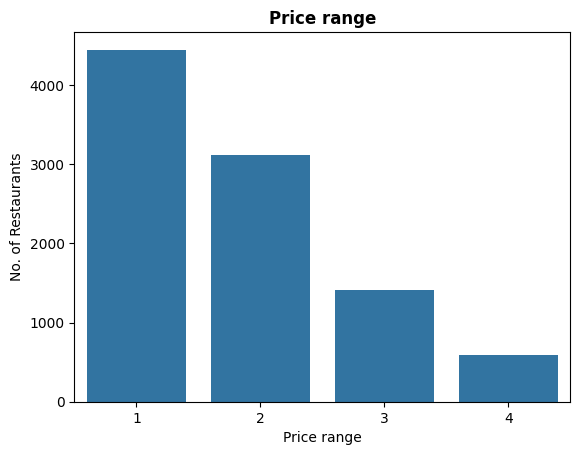

In [38]:
sns.countplot(x=res_df["Price range"])
plt.title("Price range" , weight = "bold")
plt.xlabel("Price range")
plt.ylabel("No. of Restaurants")

In [39]:
filtered_votes = res_df[res_df["Votes"] > 100]["Votes"].value_counts()
print(filtered_votes)


Votes
103     20
114     20
134     19
109     18
113     18
        ..
3374     1
615      1
538      1
823      1
901      1
Name: count, Length: 911, dtype: int64


In [40]:
res_df["Aggregate rating"].value_counts().head()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
Name: count, dtype: int64

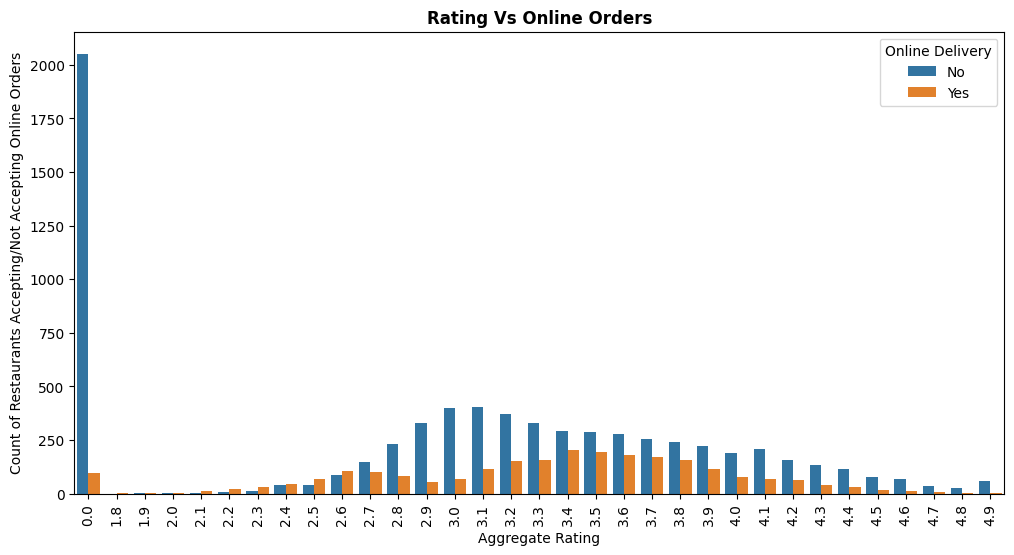

In [41]:

# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Aggregate rating', hue='Has Online delivery', data=res_df)
plt.title("Rating Vs Online Orders", weight="bold")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count of Restaurants Accepting/Not Accepting Online Orders")
plt.xticks(rotation=90)
plt.legend(title="Online Delivery")

Encoding the categorial variables

In [44]:
categorial_columns = res_df[["Has Table booking", "Has Online delivery","Is delivering now", "Rating color", "Rating text"]]


In [45]:
# Encoding the categorial varaibles

label_encoder = {}

for col in categorial_columns:
  label_encoder[col] = LabelEncoder()
  res_df[col] = label_encoder[col].fit_transform(res_df[col])

In [46]:
res_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [47]:
res_df.drop(["Restaurant ID", "City","Restaurant Name","Country Code", "Address", "Locality","Longitude","Latitude","Cuisines", "Currency", "Switch to order menu"], axis=1, inplace=True)

In [53]:
res_df.columns
res_df.drop(["Locality Verbose"], axis=1, inplace=True)

Text(0, 0.5, 'Votes')

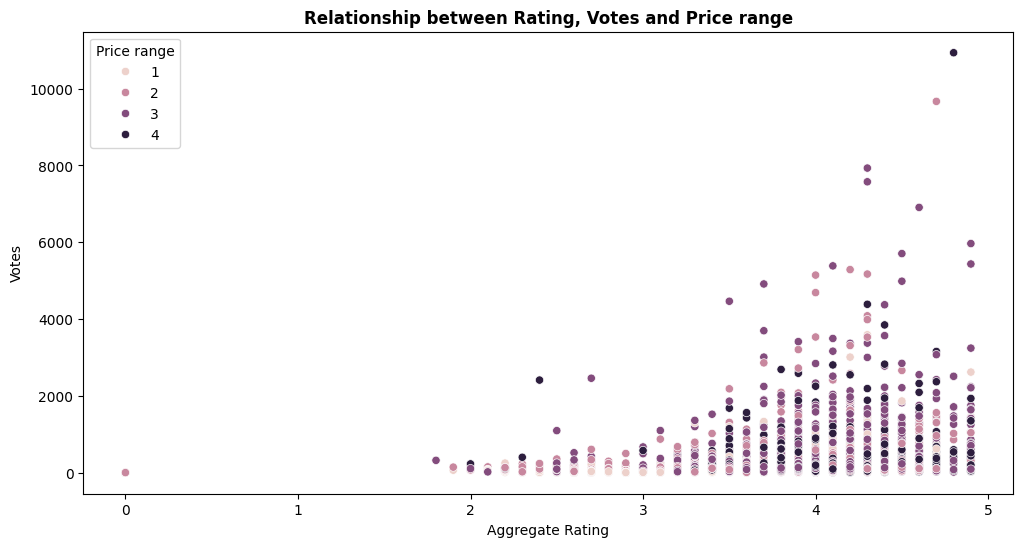

In [48]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Aggregate rating", y = "Votes", hue= "Price range", data=res_df)
plt.title("Relationship between Rating, Votes and Price range", weight="bold")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")

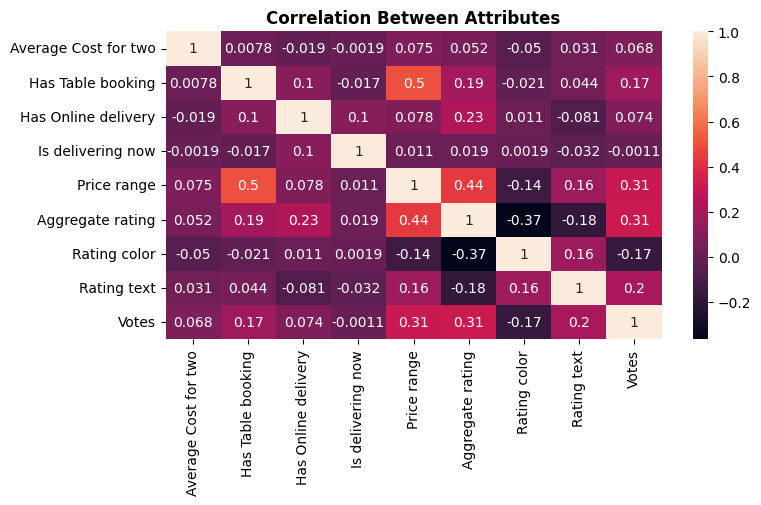

In [55]:
plt.figure(figsize=(8, 4))
sns.heatmap(res_df.corr(), annot=True)
plt.title("Correlation Between Attributes", weight="bold")
plt.show()

Splitting the Data

In [56]:
res_df.columns

Index(['Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Rating color',
       'Rating text', 'Votes'],
      dtype='object')

In [57]:
# Split the data into Features and Target variable
X = res_df.drop("Aggregate rating", axis=1)
Y = res_df["Aggregate rating"]

In [58]:
# Split the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [59]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(9551, 8)
(7640, 8)
(1911, 8)


Apply the LinearRegression model

In [60]:

# Apply the LinearRegression model on Training Data
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [62]:
X_test_predictions = model.predict(X_test)
mean_squared_error = mean_squared_error(Y_test, X_test_predictions)
mean_abs_error = mean_absolute_error(Y_test, X_test_predictions)
r2_score = r2_score(Y_test, X_test_predictions)
print("Mean Squared Error: ", mean_squared_error)
print( "Mean Absolute Error: ", mean_abs_error)
print("R2 Score: ", r2_score)

Mean Squared Error:  1.351093767565033
Mean Absolute Error:  0.9666653179842812
R2 Score:  0.40495008488996387


Apply the Decision tree Regression model

In [64]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
decision_tree_pred = decision_tree.predict(X_test)
d_tree_mse = mean_squared_error(Y_test, decision_tree_pred)
d_tree_mae = mean_absolute_error(Y_test, decision_tree_pred)
d_tree_r2 = r2_score(Y_test, decision_tree_pred)

#Print the model accuracy
print("Mean Squared Error: ", d_tree_mse)
print("Mean Absolute Error: ", d_tree_mae)
print("R2 Score: ", d_tree_r2)

Mean Squared Error:  0.05323548729407662
Mean Absolute Error:  0.14581763729168845
R2 Score:  0.9765539794826588


Based on these metrics, the decision tree model appears to perform  much better than the linear regression model.